In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [7]:
ln_df=pd.read_csv("latnav_2_synth.csv", delimiter=";")

In [8]:
ln_df.head()

,Unnamed: 0,Benchmark,regions,trainingIterations,testIterations,totalPos,totalNeg,fp_rate,fn_rate,fn_percerr_mean,...,fn_percerr_2.5percentile,fn_percerr_10percentile,fn_percerr_firstquartile,fn_percerr_median,fn_percerr_thirdquartile,fn_percerr_90percentile,fn_percerr_97.5percentile,fn_percerr_99percentile,fn_percerr_min,fn_percerr_max
0,0,NaN,16.0,800.0,50000.0,50000.0,25802840.0,16.340,55.099032,1.190994,...,0.000011,0.000011,0.000078,0.000713,0.032375,0.125168,8.007048,32.042959,0.000006,299.773502
1,1,NaN,16.0,1600.0,50000.0,50000.0,28029479.0,9.274,56.697807,1.894934,...,0.000011,0.000011,0.000078,0.000828,0.034706,0.205612,22.160403,75.935048,0.000006,300.000000
2,2,NaN,16.0,3200.0,50000.0,50000.0,29407987.0,4.906,58.023523,2.769751,...,0.000011,0.000011,0.000079,0.001139,0.036163,0.500511,32.042584,89.093620,0.000006,300.000000
3,3,NaN,16.0,6400.0,50000.0,50000.0,30262430.0,2.198,58.855327,3.578548,...,0.000011,0.000011,0.000081,0.001375,0.036751,0.551264,53.798330,110.353904,0.000006,1151.853466
4,4,NaN,16.0,12800.0,50000.0,50000.0,30665260.0,0.904,59.764656,4.792979,...,0.000011,0.000011,0.000088,0.001437,0.037335,0.738112,85.103375,112.096846,0.000006,1199.188137


In [9]:
ln_df.dropna(axis=1, inplace=True)

In [10]:
ln_df.drop(ln_df[ln_df['regions'] != 16 ].index, inplace=True)

In [11]:
ln_df.head()

,Unnamed: 0,regions,trainingIterations,testIterations,totalPos,totalNeg,fp_rate,fn_rate,fn_percerr_mean,fn_relerr_var,...,fn_percerr_2.5percentile,fn_percerr_10percentile,fn_percerr_firstquartile,fn_percerr_median,fn_percerr_thirdquartile,fn_percerr_90percentile,fn_percerr_97.5percentile,fn_percerr_99percentile,fn_percerr_min,fn_percerr_max
0,0,16.0,800.0,50000.0,50000.0,25802840.0,16.340,55.099032,1.190994,0.009474,...,0.000011,0.000011,0.000078,0.000713,0.032375,0.125168,8.007048,32.042959,0.000006,299.773502
1,1,16.0,1600.0,50000.0,50000.0,28029479.0,9.274,56.697807,1.894934,0.016518,...,0.000011,0.000011,0.000078,0.000828,0.034706,0.205612,22.160403,75.935048,0.000006,300.000000
2,2,16.0,3200.0,50000.0,50000.0,29407987.0,4.906,58.023523,2.769751,0.025020,...,0.000011,0.000011,0.000079,0.001139,0.036163,0.500511,32.042584,89.093620,0.000006,300.000000
3,3,16.0,6400.0,50000.0,50000.0,30262430.0,2.198,58.855327,3.578548,0.037505,...,0.000011,0.000011,0.000081,0.001375,0.036751,0.551264,53.798330,110.353904,0.000006,1151.853466
4,4,16.0,12800.0,50000.0,50000.0,30665260.0,0.904,59.764656,4.792979,0.056315,...,0.000011,0.000011,0.000088,0.001437,0.037335,0.738112,85.103375,112.096846,0.000006,1199.188137


In [14]:
ann_df=pd.read_csv("ann_synth.csv", delimiter=";")

In [16]:
ann_df.dropna(axis=1, inplace=True)

In [17]:
ann_df['regions'].value_counts()

regions
16.0    9
Name: count, dtype: int64

In [18]:
fft_df=pd.read_csv("fft_8_synth.csv", delimiter=";")

In [19]:
fft_df.dropna(axis=1, inplace=True)

In [20]:
fft_df['regions'].value_counts()

regions
16.0    7
Name: count, dtype: int64

In [21]:
gauss_df=pd.read_csv("gauss_synth.csv", delimiter=";")

In [22]:
gauss_df.dropna(axis=1, inplace=True)

In [23]:
gauss_df['regions'].value_counts()

regions
16.0    7
Name: count, dtype: int64

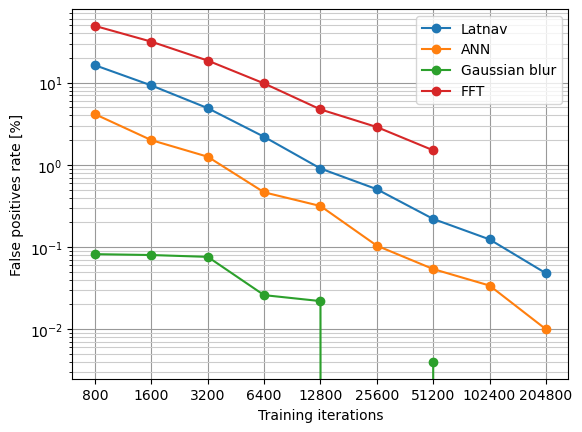

In [108]:
fig = plt.plot(np.log2((ln_df["trainingIterations"]/100)).astype(int), ln_df["fp_rate"],marker="o", label='Latnav')
plt.plot(np.log2((ann_df["trainingIterations"]/100)).astype(int), ann_df["fp_rate"],marker="o", label="ANN")
plt.plot(np.log2((gauss_df["trainingIterations"]/100)).astype(int), gauss_df["fp_rate"],marker="o", label="Gaussian blur")
plt.plot(np.log2((fft_df["trainingIterations"]/100)).astype(int), fft_df["fp_rate"],marker="o", label="FFT")

        
plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')
plt.yscale('log')
ax = plt.gca()
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.tick_params(axis='y', which='minor', bottom=False)
#plt.gcf().subplots_adjust(left=0.2)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))
    
#plt.style.use('classic')
#region_2d_trainIterations=np.array(region_trainIterations)
#region_2d_fp_rate=np.array(region_fp_rate)
#ax.set_ylim([pow(10, math.floor(math.log10(np.min(region_2d_fp_rate)))), pow(10, math.ceil(math.log10(np.max(region_2d_fp_rate))))])
        
#ax.yaxis.set_major_formatter(tkr.PercentFormatter(decimals=2))




plt.xlabel("Training iterations")
plt.ylabel("False positives rate [%]")
plt.legend()

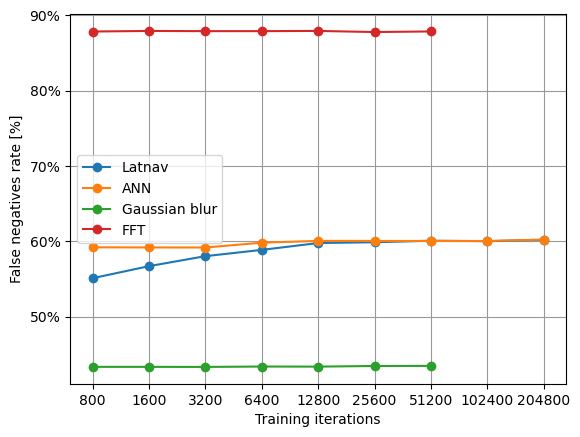

In [114]:
fig = plt.plot(np.log2((ln_df["trainingIterations"]/100)).astype(int), ln_df["fn_rate"],marker="o", label='Latnav')
plt.plot(np.log2((ann_df["trainingIterations"]/100)).astype(int), ann_df["fn_rate"],marker="o", label="ANN")
plt.plot(np.log2((gauss_df["trainingIterations"]/100)).astype(int), gauss_df["fn_rate"],marker="o", label="Gaussian blur")
plt.plot(np.log2((fft_df["trainingIterations"]/100)).astype(int), fft_df["fn_rate"],marker="o", label="FFT")

plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')
#plt.yscale('log')
ax = plt.gca()
#plt.style.use('classic')
#region_2d_trainIterations=np.array(region_trainIterations)
#region_2d_fp_rate=np.array(region_fp_rate)
#ax.set_ylim([pow(10, math.floor(math.log10(np.min(region_2d_fp_rate)))), pow(10, math.ceil(math.log10(np.max(region_2d_fp_rate))))])
ax.yaxis.set_major_formatter(tkr.PercentFormatter(decimals=0))

#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.tick_params(axis='y', which='minor', bottom=False)
#plt.gcf().subplots_adjust(left=0.2)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))
        

plt.xlabel("Training iterations")
plt.ylabel("False negatives rate [%]")
plt.legend()

In [141]:
ln_df.drop(ln_df[ln_df['trainingIterations'] > 51200 ].index, inplace=True)

In [142]:
ann_df.drop(ann_df[ann_df['trainingIterations'] > 51200 ].index, inplace=True)

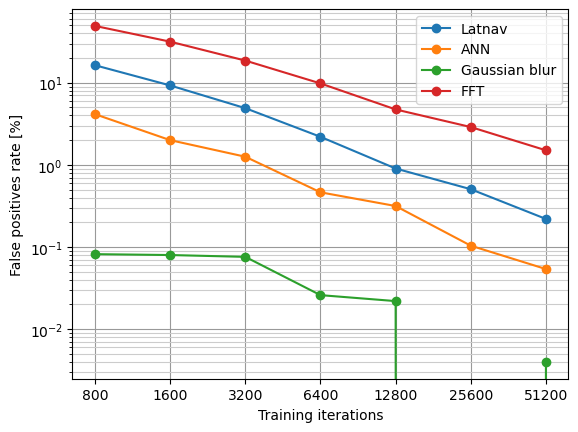

In [143]:
fig = plt.plot(np.log2((ln_df["trainingIterations"]/100)).astype(int), ln_df["fp_rate"],marker="o", label='Latnav')
plt.plot(np.log2((ann_df["trainingIterations"]/100)).astype(int), ann_df["fp_rate"],marker="o", label="ANN")
plt.plot(np.log2((gauss_df["trainingIterations"]/100)).astype(int), gauss_df["fp_rate"],marker="o", label="Gaussian blur")
plt.plot(np.log2((fft_df["trainingIterations"]/100)).astype(int), fft_df["fp_rate"],marker="o", label="FFT")

        
plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')
plt.yscale('log')
ax = plt.gca()
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.tick_params(axis='y', which='minor', bottom=False)
#plt.gcf().subplots_adjust(left=0.2)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))
    
#plt.style.use('classic')
#region_2d_trainIterations=np.array(region_trainIterations)
#region_2d_fp_rate=np.array(region_fp_rate)
#ax.set_ylim([pow(10, math.floor(math.log10(np.min(region_2d_fp_rate)))), pow(10, math.ceil(math.log10(np.max(region_2d_fp_rate))))])
        
#ax.yaxis.set_major_formatter(tkr.PercentFormatter(decimals=2))




plt.xlabel("Training iterations")
plt.ylabel("False positives rate [%]")
plt.legend()

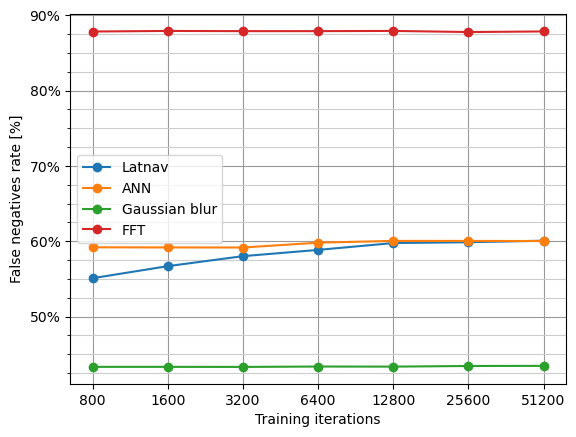

In [157]:
fig = plt.plot(np.log2((ln_df["trainingIterations"]/100)).astype(int), ln_df["fn_rate"],marker="o", label='Latnav')
plt.plot(np.log2((ann_df["trainingIterations"]/100)).astype(int), ann_df["fn_rate"],marker="o", label="ANN")
plt.plot(np.log2((gauss_df["trainingIterations"]/100)).astype(int), gauss_df["fn_rate"],marker="o", label="Gaussian blur")
plt.plot(np.log2((fft_df["trainingIterations"]/100)).astype(int), fft_df["fn_rate"],marker="o", label="FFT")

plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')
#plt.yscale('log')
ax = plt.gca()
plt.tick_params(axis='y', which='minor')

#plt.style.use('classic')
#region_2d_trainIterations=np.array(region_trainIterations)
#region_2d_fp_rate=np.array(region_fp_rate)
#ax.set_ylim([pow(10, math.floor(math.log10(np.min(region_2d_fp_rate)))), pow(10, math.ceil(math.log10(np.max(region_2d_fp_rate))))])
ax.yaxis.set_major_formatter(tkr.PercentFormatter(decimals=0))
ax.yaxis.set_minor_locator(tkr.AutoMinorLocator(4))

#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.tick_params(axis='y', which='minor', bottom=False)
#plt.gcf().subplots_adjust(left=0.2)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))
        

plt.xlabel("Training iterations")
plt.ylabel("False negatives rate [%]")
plt.legend(
    #loc='upper right'
)